In [77]:
import numpy as np
from numpy import sin,cos,tan,exp
from math import pi
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

In [109]:
conv = 2*pi/360
A = 2
s = 4
h = 2

def ratio(alp,bet,psi,S):
    bet,alp,psi = conv*bet,conv*alp,conv*psi
    
    xb = -0.5*A*cos(bet) + S
    yb = -0.5*A*sin(bet) + h
    B = [xb,yb]
    
    xp = (0.5*A*(sin(alp) + cos(alp)*tan(psi)) + S*tan(bet))/(tan(bet) + tan(psi))
    yp = tan(bet)*(xp - S) + h
    P = [xp ,yp]
    
    d = np.sqrt((P[0] - B[0])**2 + (P[1] - B[1])**2)
    
    if (P[0] >= B[0]) and (d < A):
        R = 1 - d/A
    elif (P[0] >= B[0]) and (d >= A):
        R = 0
    elif (P[0] < B[0]):    
        R = 1
        
    # print(P,B)
    return [P,B]
    # return R

def potencia0(alp0,psi):
    P = A*sin(pi - conv*psi  - conv*alp0)
    return P

def potencia(alp1,alp0,psi,N):
    P = A*ratio(alp0,alp1,psi,N)*sin(pi - conv*psi  - conv*alp1)
    return P

def potencia_rat(S,alp,psi):
    P = A*S*sin(pi - conv*psi  - conv*alp)
    return P


def SxA(th,ps):
    th,ps = th*conv,ps*conv
    
    return sin(th)*cos(ps) - cos(th)*sin(ps)


def plot_placa_(alpha,N,phi):
    alpha = alpha*conv
    phi = phi*conv
    plt.vlines(x=N*s, ymin=0, ymax=h, linewidth=2, color='black')
    
    x = np.linspace(-0.5*A*cos(alpha),0.5*A*cos(alpha),100)     
    y_ = tan(alpha)*x + h
    
    plt.plot(x+N*s,y_, linewidth=2, color='black')
    
    x_ = np.linspace(-100,100,100)
    
    plt.plot(x_ + N*s ,
             -tan(phi)*x_ + y_[-1] + tan(phi)*x[-1],
             linewidth=2, 
             color='orange',alpha = 0.3)
    
    

alp = [45,45,45,45,45,45]
psi = 45

def coste(alp):
    I,J = [0],[0]
    S = [1]

    for i in range(len(alp)-1):
        for j in range(i+1,len(alp)):
            S.append(ratio(alp[i],alp[j],psi,(j-i)*s))
            I.append(i)
            J.append(j)
            
    ratios = pd.DataFrame({'i':I,'j':J,'S':S})
    jun = np.unique(ratios.j)
    
    rt = []
    for j in jun:
        rt.append(np.min(ratios[ratios.j == j].S))
    
    P = 0
    for i in range(len(alp)):
        P += potencia_rat(rt[i],alp[i],psi)
    return -P
    # return [-P,S]

In [125]:
def ratio(alp,bet,psi,S):
    bet,alp,psi = conv*bet,conv*alp,conv*psi
    xb = -0.5*A*cos(bet) + N*s
    yb = -0.5*A*sin(bet) + h
    B = [xb,yb]
    
    xp = (0.5*A*(sin(alp) + cos(alp)*tan(psi)) + N*s*tan(bet) + (N-1)*s*tan(psi))/(tan(bet) + tan(psi))
    yp = tan(bet)*(xp - N*s) + h
    P = [xp ,yp]
    
    d = np.sqrt((P[0] - B[0])**2 + (P[1] - B[1])**2)
    
    R = d/A
    
    if (P[0] < B[0]):
        R = -d/A
    
    return R

In [123]:

def ratio(alp,bet,psi,N):
    bet,alp,psi = conv*bet,conv*alp,conv*psi
    
    xb = -0.5*A*cos(bet) + N*s
    yb = -0.5*A*sin(bet) + h
    B = [xb,yb]
    
    xp = (0.5*A*(sin(alp) + cos(alp)*tan(psi)) + N*s*tan(bet) + (N-1)*s*tan(psi))/(tan(bet) + tan(psi))
    yp = tan(bet)*(xp - N*s) + h
    P = [xp ,yp]
    
    d = np.sqrt((P[0] - B[0])**2 + (P[1] - B[1])**2)
    
    if (P[0] >= B[0]) and (d < A):
        R = 1 - d/A
    elif (P[0] >= B[0]) and (d >= A):
        R = 0
    elif (P[0] < B[0]):    
        R = 1
        
    # print(P,B)
    return [P,B]

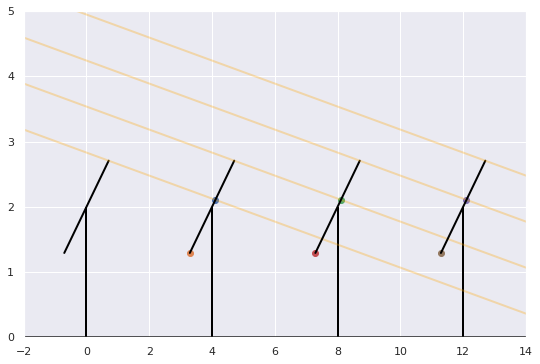

In [124]:
alp = [45,45,45,45]
plt.figure(figsize = (9,6))
plt.axhline(y=0, color='black', linestyle='-')
psi = 10
for i in range(len(alp)-1):
    P = ratio(alp[i],alp[i+1],psi,(i+1))[0]
    B = ratio(alp[i],alp[i+1],psi,(i+1))[1]
    plt.scatter(P[0],P[1])
    plt.scatter(B[0],B[1])
    plot_placa_(alp[i],i,psi)
plot_placa_(alp[i+1],i+1,psi)    
plt.ylim([0,5])
plt.xlim([-2,A + (len(alp)-1)*s])
plt.show()